In [10]:
import numpy as np
import pandas as pd

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

torch.__version__, fastai.__version__

('1.11.0', '2.7.9')

In [11]:
# data
path = Path('../input/pnevmoniya/train/')

fls = get_image_files(path)

In [12]:
# Data Block yaratib olamiz
pnevmoniya = DataBlock(
                        blocks=(ImageBlock, CategoryBlock),    # kategoriyalarga ajratish uchun
                        get_items=get_image_files,    # fayllarni qayerdan olishini ko'rsatamiz
                        splitter=RandomSplitter(valid_pct=0.2, seed=12),  # seed-random state, train_size=0.8, test_size=0.2
                        get_y=parent_label,   # rasmlarni bo'lganda fastai o'zi yorliq berib ketadi
                        item_tfms=Resize(224) # rasmlar o'lchamini o'zgartirish
                        )

In [13]:
# # lebillovchi funksiya
# def is_pnevmoniya(x): return x[0].isupper()

# # datalarni yukllovchi(dataloader)
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), #valid = 0.2, seed=42,
#     label_func=is_pnevmoniya#, item_tfms=Resize(224)
# )

In [14]:
# Data Loader yaratib olamiz
dls = pnevmoniya.dataloaders(path)

In [15]:
failed = verify_images(path)
failed

zip argument #1 must support iteration


(#0) []

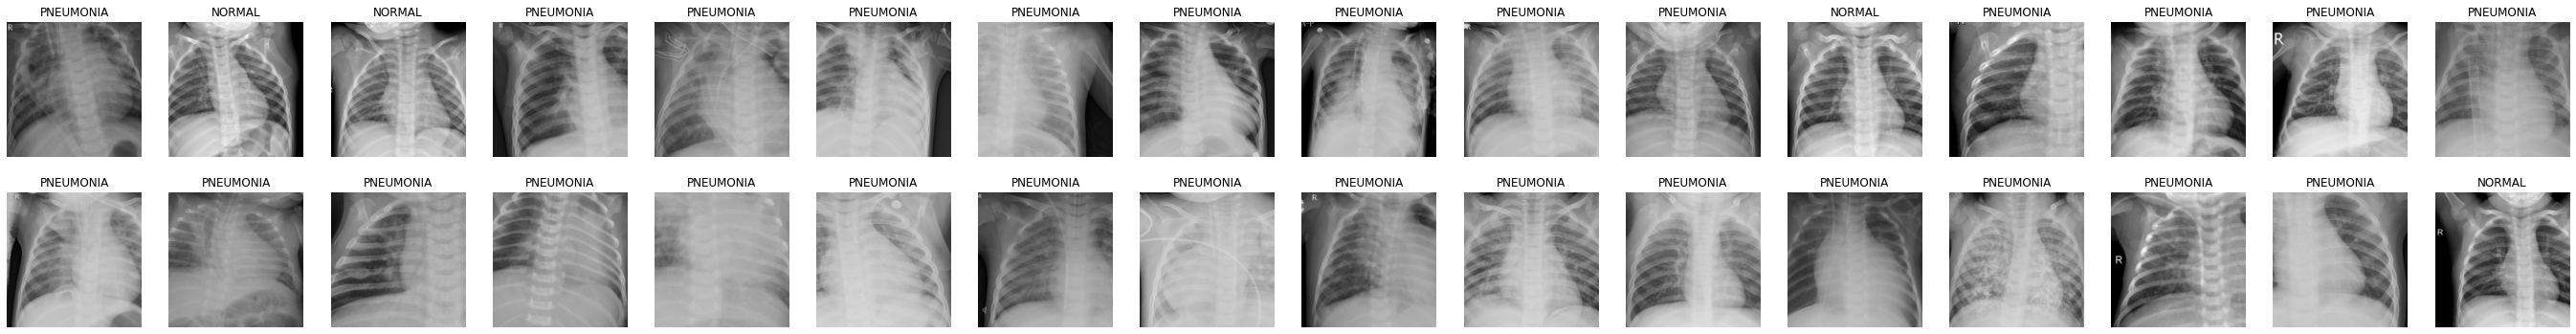

In [16]:
dls.train.show_batch(max_n=32, nrows=2)

In [44]:
# o'qitish(training)
# learn = cnn_learner(dls, resnet34, metrics=accuracy)    # cnn_learner  modelning nomi >> vision_learner ga o'zgargan
# learn = vision_learner(dls, resnet34, metrics=accuracy)   #  fine_tune= , accuracy 0. >> 0.
# learn = vision_learner(dls, resnet50, metrics=accuracy)   #  fine_tune= 6 - 10, accuracy 0.9932 >> 0.990412
# learn = vision_learner(dls, resnet101, metrics=accuracy)   #  fine_tune= 6 - , accuracy 0.993289 >> 0.
learn = vision_learner(dls, resnet152, metrics=accuracy)     #  fine_tune= 4 - , accuracy 0.991371 >> 0.
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.412405,0.250196,0.938639,02:53


epoch,train_loss,valid_loss,accuracy,time
0,0.148887,0.154386,0.974113,03:02
1,0.093778,0.085414,0.980825,03:04
2,0.061262,0.034288,0.989453,03:03
3,0.025649,0.031050,0.991371,03:02


In [18]:
# # o'qitish(training)
# learn = vision_learner(dls, resnet101, metrics=accuracy)
# learn.fine_tune(6)

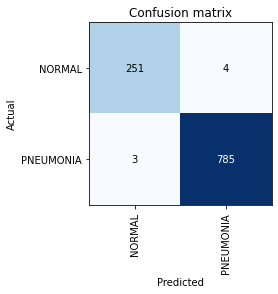

In [19]:
# Tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [38]:
# Rasm yuklash uchun widget(tugma)

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Pnevmoniyami?: PNEUMONIA
Ehtimollig: 0%
Ehtimollig: 1.000


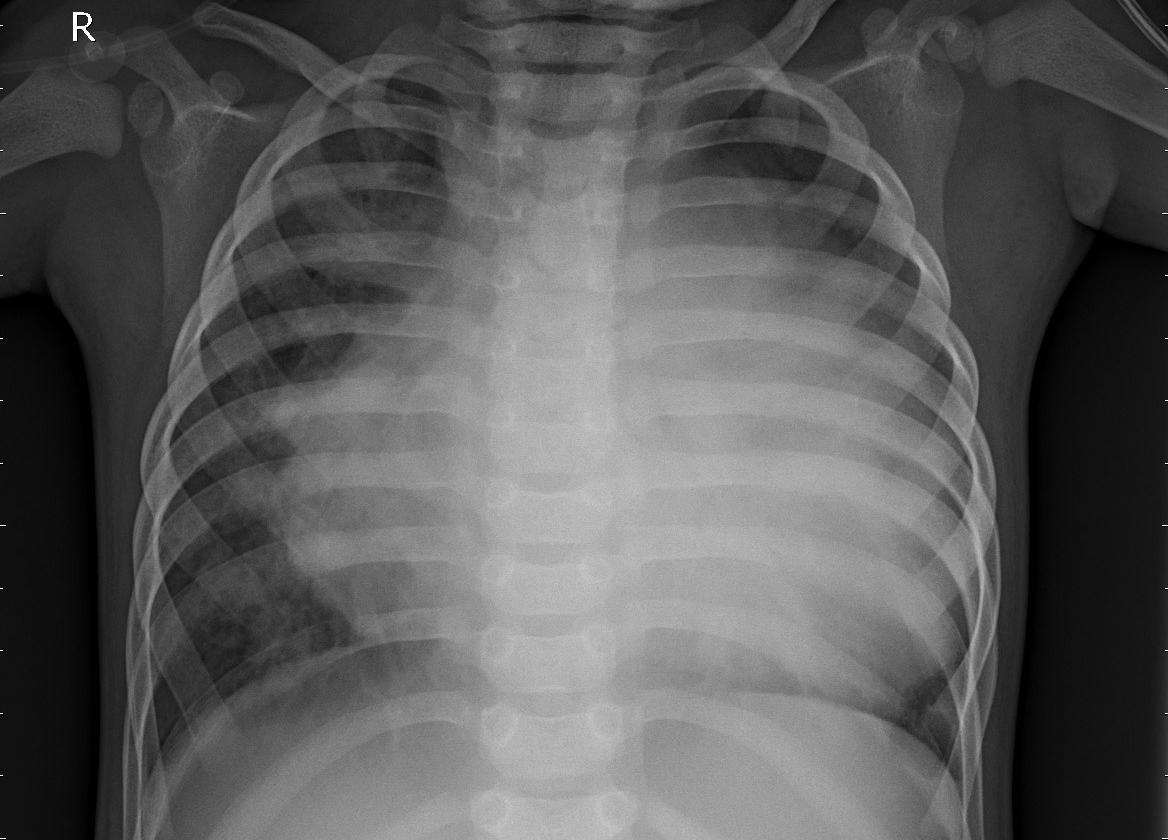

In [43]:
img = PILImage.create(upload.data[-1])    # rasm
pred, pred_id, prob = learn.predict(img)    # bashorat qilish (predict)
print(f"Pnevmoniyami?: {pred}")
print(f"Ehtimollig: {int(prob[pred_id].item())*100}%")
print(f"Ehtimollig: {prob[pred_id].item():.3f}")    
img

In [30]:
prob

TensorBase([9.9982e-01, 1.8341e-04])

In [31]:
pred

'NORMAL'

In [ ]:
# # modelni saqlab olish
# with open('RFC_model.pkl','wb') as f:
#     pickle.dump(RFC_model, f)

In [ ]:
# y_pred_rfc = RFC_model.predict(test_data_prepared)

# sample_submission['satisfaction'] = y_pred_rfc
# sample_submission

In [ ]:
# sample_submission.to_csv("sample_submission.csv", index=False)